<a href="https://colab.research.google.com/github/linyuehzzz/hedetniemi_distance/blob/master/hedetniemi_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Hedetniemi Matrix Sum**
This code is used to implement the [Hedetniemi Matrix Sum](https://deepblue.lib.umich.edu/handle/2027.42/59763).  
Yue Lin (lin.3326 at osu.edu)  
Created: 5/6/2020

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### **Install packages** 

In [0]:
!pip install timeout-decorator

  Created wheel for timeout-decorator: filename=timeout_decorator-0.4.1-cp36-none-any.whl size=5021 sha256=002a591f7410363d5b940e39f22e3279ade5dae9c50180d491cd577e9d0589f9
  Stored in directory: /root/.cache/pip/wheels/f1/e6/ea/7387e3629cb46ba65140141f972745b823f4486c6fe884ccb8
Successfully built timeout-decorator


#### **Generate graph data** 

#####Data from the original article

In [0]:
## [node i, node j, distance between node i and j]
## using data from example 1: San Francisco Bay Area Graph of Time-Distances (in minutes)
data = [[1, 2, 30], [1, 4, 30], [1, 9, 40],
        [2, 3, 25], [2, 4, 40], [3, 4, 50],
        [4, 5, 30], [4, 6, 20], [5, 7, 25],
        [6, 7, 20], [6, 9, 20], [7, 8, 25],
        [8, 9, 20]]

##### Create random graph

/content/gdrive/My Drive/Colab Notebooks/hedetniemi_matrix_sum
Nodes:  1000
Degree:  3


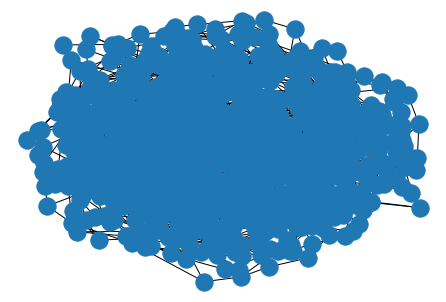

In [0]:
%cd '/content/gdrive/My Drive/Colab Notebooks/hedetniemi_matrix_sum'
import networkx as nx
import random

## Number of nodes (100/1,000/10,000/100,000/1,000,000)
nodes = 1000
print('Nodes: ', nodes)
## Total degree
degree = 3
print('Degree: ', degree)

G = nx.random_regular_graph(degree,nodes)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.uniform(1,100)
nx.draw(G)
nx.write_weighted_edgelist(G, 'graph_n' + str(nodes) + '_d' + str(degree) + '.txt')

##### Read random graph

In [0]:
%cd '/content/gdrive/My Drive/Colab Notebooks/hedetniemi_matrix_sum'

## Number of nodes (100/1,000/10,000/100,000/1,000,000)
nodes = 100
print('Nodes: ', nodes)
## Total degree
degree = 3
print('Degree: ', degree)

data = []
with open('graph_n' + str(nodes) + '_d' + str(degree) + '.txt', 'r') as f:
  lines = f.read().splitlines()
  for line in lines:
    l = line.split()
    item = [int(l[0]), int(l[1]), float(l[2])]
    data.append(item)

print(data[0])

/content/gdrive/My Drive/Colab Notebooks/hedetniemi_matrix_sum
Nodes:  100
Degree:  3
[77, 86, 89.39726376738572]


#### **Implementation 1: list** 

##### Construct distance matrix

In [0]:
from timeit import default_timer
import timeout_decorator

@timeout_decorator.timeout(10)
def distance_matrix(graph):
  ## calculate number of nodes
  n = max([g[1] for g in graph])

  ## calculate distance matrix
  INF = float('inf')
  dist_mtx = [[INF] * n for i in range(n)]
  for g in graph:
    i = g[0] - 1
    j = g[1] - 1
    d = g[2]
    dist_mtx[i][j] = d
    dist_mtx[j][i] = d

  ## set diagonal to 0
  for i in range(n):
    dist_mtx[i][i] = 0.0
 
  return dist_mtx, n


## print time costs
try:
  start = default_timer()
  dist_mtx, n = distance_matrix(data)
  stop = default_timer()
  print('Time: ', stop - start)
except:
  print('Time: inf')

## print distance matrix
# print("Distance matrix: ")
# for line in dist_mtx:
#   print(line)

Time:  0.0002766739999060519


##### Calculate Hedetniemi Matrix Sum

In [0]:
from timeit import default_timer
import timeout_decorator

@timeout_decorator.timeout(10)
def hede_distance(matrix, n):
  INF = float('inf')
  mtx_a_t = [[INF] * n for i in range(n)]
  mtx_a_t_1 = matrix

  p = True
  while p:
    for i in range(n):
      a = mtx_a_t_1[i]
      for j in range(n):
        b = [row[j] for row in matrix]
        mtx_a_t[i][j] = min([a[k] + b[k] for k in range(n)])
    
    if mtx_a_t == mtx_a_t_1:
      p =  False
    else:
      mtx_a_t_1 = mtx_a_t   
  
  return mtx_a_t


## print time costs
try:
  start = default_timer()
  mtx_a_t = hede_distance(dist_mtx, n)
  stop = default_timer()
  print('Time: ', stop - start)
except:
  print('Time: inf')

## print shortest path matrix
with open('hedet_mtx_list.txt', 'w') as fw:
  fw.write('\n'.join(['\t'.join([str(cell) for cell in row]) for row in mtx_a_t]))

Time:  0.24860662399987632


#### **Implementation 2: numpy** 

##### Construct distance matrix

In [0]:
from timeit import default_timer
import numpy as np
import timeout_decorator

@timeout_decorator.timeout(10)
def distance_matrix(graph):
  ## calculate number of nodes
  n = int(np.amax(graph[:,1]))

  ## calculate distance matrix
  dist_mtx = np.full((n,n), np.inf)
  for g in graph:
    i = int(g[0]) - 1
    j = int(g[1]) - 1
    d = g[2]
    dist_mtx[i,j] = d
    dist_mtx[j,i] = d

  ## set diagonal to 0
  np.fill_diagonal(dist_mtx, 0)
 
  return dist_mtx, n


## print time costs
try:
  start = default_timer()
  dist_mtx, n = distance_matrix(np.array(data))
  stop = default_timer()
  print('Time: ', stop - start)
except:
  print('Time: inf')

## print distance matrix
# print("Distance matrix: ")
# for line in dist_mtx:
#   print(line)

Time:  0.00039227799970831256


##### Calculate Hedetniemi Matrix Sum

In [0]:
from timeit import default_timer
import numpy as np
import timeout_decorator

@timeout_decorator.timeout(10)
def hede_distance(matrix, n):
  mtx_a_t = np.full((n,n), np.inf)
  mtx_a_t_1 = matrix

  p = True
  while p:
    for i in range(n):
      a = mtx_a_t_1[i]
      for j in range(n):
        b = matrix[:,j]
        mtx_a_t[i,j] = np.amin([a[k] + b[k] for k in range(n)])
    
    if np.array_equal(mtx_a_t, mtx_a_t_1):
      p =  False
    else:
      mtx_a_t_1 = mtx_a_t   
  
  return mtx_a_t


## print time costs
try:
  start = default_timer()
  mtx_a_t = hede_distance(dist_mtx, n)
  stop = default_timer()
  print('Time: ', stop - start)
except:
  print('Time: inf')

## print shortest path matrix
with open('hedet_mtx_np.txt', 'w') as fw:
  fw.write('\n'.join(['\t'.join([str(cell) for cell in row]) for row in mtx_a_t.tolist()]))

Time:  1.4320983480001814


#### **Implementation 3: numba (njit)** 

##### Construct distance matrix

In [0]:
!pip show numba

Name: numba
Version: 0.48.0
Summary: compiling Python code using LLVM
Home-page: http://numba.github.com
Author: Anaconda, Inc.
Author-email: numba-users@continuum.io
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: llvmlite, numpy, setuptools
Required-by: umap-learn, resampy, librosa


In [0]:
from timeit import default_timer
import numpy as np
import numba
import timeout_decorator

@timeout_decorator.timeout(10)
@numba.njit
def distance_matrix(graph):
  ## calculate number of nodes
  n = int(np.amax(graph[:,1]))

  ## calculate distance matrix
  dist_mtx = np.full((n,n), np.inf)
  for g in numba.prange(graph.shape[0]):
    i = int(graph[g][0]) - 1
    j = int(graph[g][1]) - 1
    d = graph[g][2]
    dist_mtx[i,j] = d
    dist_mtx[j,i] = d

  ## set diagonal to 0
  np.fill_diagonal(dist_mtx, 0)
 
  return dist_mtx, n


## print time costs
try:
  start = default_timer()
  dist_mtx, n = distance_matrix(np.array(data))
  stop = default_timer()
  print('Time: ', stop - start)
except:
  print('Time: inf')

## print distance matrix
# print("Distance matrix: ")
# for line in dist_mtx:
#   print(line)

Time:  0.2702719460003209


##### Calculate Hedetniemi Matrix Sum

In [0]:
from timeit import default_timer
import numpy as np
import numba
import timeout_decorator

@timeout_decorator.timeout(10)
@numba.njit
def hede_distance(matrix, n):
  mtx_a_t = np.full((n,n), np.inf)
  mtx_a_t_1 = matrix

  p = True
  while p:
    for i in numba.prange(n):
      a = mtx_a_t_1[i]
      for j in numba.prange(n):
        b = matrix[:,j]
        mtx_a_t[i,j] = np.amin(np.array([a[k] + b[k] for k in range(n)]))
    
    if np.array_equal(mtx_a_t, mtx_a_t_1):
      p =  False
    else:
      mtx_a_t_1 = mtx_a_t   
  
  return mtx_a_t


## print time costs
try:
  start = default_timer()
  mtx_a_t = hede_distance(dist_mtx, n)
  stop = default_timer()
  print('Time: ', stop - start)
except:
  print('Time: inf')

## print shortest path matrix
with open('hedet_mtx_nb.txt', 'w') as fw:
  fw.write('\n'.join(['\t'.join([str(cell) for cell in row]) for row in mtx_a_t.tolist()]))

Time:  0.3338784970001143


#### **Implementation 4: tensorflow** 

In [0]:
!pip install tensorflow

In [0]:
import tensorflow as tf
print(tf.version.VERSION)
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.2.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


##### Construct distance matrix (tensorflow)

In [0]:
# from timeit import default_timer
# import tensorflow as tf
# import numpy as np

# def distance_matrix(graph):
#   ## convert graph
#   graph = tf.constant(graph, dtype=tf.float32)
#   length = tf.dtypes.cast(tf.size(graph)/3, tf.int32)
#   graph = tf.gather(graph, tf.nn.top_k(-graph[:,0], k=length).indices)

#   ## calculate number of nodes
#   n = tf.math.reduce_max(graph[:,1])
#   n = tf.dtypes.cast(n, tf.int32)

#   ########### calculate distance matrix ###########
#   m = tf.shape(graph)[0]                    ## number of rows in graph
#   k = tf.constant(0)                        ## index for row in graph
#   i = tf.constant(0, dtype=tf.float32)      ## index for row in distance matrix
#   row = tf.fill([1, n], np.inf)

#   while tf.math.less(k, m):
#     if tf.math.equal(tf.math.subtract(graph[k][0], 1), i):    
#       p = tf.one_hot([tf.math.subtract(graph[k][1], 1)], depth=n, 
#                     on_value=graph[k][2], off_value=np.inf, axis=-1)    
#       row = tf.math.minimum(row, p, name=None)
#       k = tf.math.add(k, 1)
#     else:
#       if tf.math.equal(i, 0):
#         dist_mtx = row
#       else:
#         dist_mtx = tf.concat([dist_mtx, row], 0) 
#       i = tf.math.add(i, 1)
#       row = tf.fill([1, n], np.inf)

#   dist_mtx = tf.concat([dist_mtx, row], 0)
#   row = tf.constant(tf.fill([1, n], np.inf))
#   while tf.math.less(tf.dtypes.cast(i, tf.int32), tf.math.subtract(n, 1)):  
#     dist_mtx = tf.concat([dist_mtx, row], 0)
#     i = tf.math.add(i, 1)

#   ## add transposed matrix
#   dist_mtx_tr = tf.transpose(dist_mtx)
#   dist_mtx = tf.math.minimum(dist_mtx_tr, dist_mtx, name=None)

#   ## set diagonal to 0
#   dist_mtx = tf.linalg.set_diag(dist_mtx, tf.zeros([n], tf.float32), name=None)

#   return dist_mtx, n


# ## print time costs (using gpu)
# start = default_timer()
# with tf.device('/device:GPU:0'):
#   dist_mtx, n = distance_matrix(data)
# stop = default_timer()
# print('Time using GPU: ', stop - start)

# ## print time costs (using cpu)
# start = default_timer()
# with tf.device('/cpu:0'):
#   dist_mtx, n = distance_matrix(data)
# stop = default_timer()
# print('Time using CPU: ', stop - start)

# ## print distance matrix
# # print("Distance matrix: ")
# # print(dist_mtx)

##### Construct distance matrix (numpy)

In [0]:
from timeit import default_timer
import numpy as np

def distance_matrix(graph):
  ## calculate number of nodes
  n = int(np.amax(graph[:,1]))

  ## calculate distance matrix
  dist_mtx = np.full((n,n), np.inf)
  for g in graph:
    i = int(g[0]) - 1
    j = int(g[1]) - 1
    d = g[2]
    dist_mtx[i,j] = d
    dist_mtx[j,i] = d

  ## set diagonal to 0
  np.fill_diagonal(dist_mtx, 0)

  dist_mtx = tf.convert_to_tensor(dist_mtx, dtype=tf.float32)
 
  return dist_mtx, n


## print time costs
start = default_timer()
dist_mtx, n = distance_matrix(np.array(data))
stop = default_timer()
print('Time: ', stop - start)

## print distance matrix
# print("Distance matrix: ")
# for line in dist_mtx:
#   print(line)

Time:  0.011678949000042849


##### Calculate Hedetniemi Matrix Sum

In [0]:
from timeit import default_timer
import tensorflow as tf
import numpy as np

def hede_distance(matrix, n):
  mtx_a_t_1 = matrix

  p = True
  while p:
    for i in tf.range(n):
      a = mtx_a_t_1[i]

      for j in tf.range(n):
        b = matrix[:,j]
        c = tf.math.reduce_min(tf.math.add(a, b))
        c = tf.fill([1], value=c)

        if tf.math.equal(j, 0):
          r = c
        else:
          r = tf.concat([r, c], 0)

      r = tf.expand_dims(r, 0)
      if tf.math.equal(i, 0):
        mtx_a_t = r
      else:
        mtx_a_t = tf.concat([mtx_a_t, r], 0)

    if tf.reduce_all(tf.math.equal(mtx_a_t_1, mtx_a_t)):
      p = False
    else:
      mtx_a_t_1 = mtx_a_t 

  return mtx_a_t


## print time costs (using gpu)
start = default_timer()
with tf.device('/device:GPU:0'):
  mtx_a_t = hede_distance(dist_mtx, n)
stop = default_timer()
print('Time using GPU: ', stop - start)

## print time costs (using cpu)
start = default_timer()
with tf.device('/cpu:0'):
  mtx_a_t = hede_distance(dist_mtx, n)
stop = default_timer()
print('Time using CPU: ', stop - start)

## print shortest path matrix
# print("Shortest path matrix: ")
# print(mtx_a_t)

#### **Compare results** 

In [0]:
!diff 'hedet_mtx_list.txt' 'hedet_mtx_nb.txt'